In [1]:
from nltk import *
from nltk.corpus import *
import nltk
nltk.download('stopwords')
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thudoan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Text Mining and doctoral dissertations

## Detect the language of the document

In [2]:
def language_ratio(input):
    lang_ratio={}
    tokens=wordpunct_tokenize(input)
    words=[word.lower()for word in tokens]
    for language in stopwords.fileids():
        stopwords_set=set(stopwords.words(language))
        words_set=set(words)
        common_elements=words_set.intersection(stopwords_set)
        lang_ratio[language]=len(common_elements)
    return lang_ratio
def detect_lang(input):
    ratios=language_ratio(input)
    language=max(ratios,key=ratios.get)
    return language

In [3]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'bengali',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [4]:
messages = [line.rstrip() for line in open('Data/Tel_text/tel-03435883.txt',encoding="utf8")]
print(len(messages))

23777


In [5]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0    Les systèmes Toxine-Antitoxine VapBC : des régulateurs


1 


2    de la symbiose fixatrice d’azote Rhizobium-Légumineuse


3 


4                                               Camille Syska


5 


6 


7 


8 


9 




In [6]:
messages = pd.read_csv('Data/Tel_text/tel-03435883.txt', sep='\t',
                           names=["Message", "Label"])
messages.head()

,Message,Label
0,Les systèmes Toxine-Antitoxine VapBC : des ...,NaN
1,de la symbiose fixatrice d’azote Rhizobium-...,NaN
2,...,NaN
3,To cite this version:,NaN
4,Camille Syska. Les systèmes Toxine-Antitox...,NaN


In [7]:
language=detect_lang(messages['Message'].iloc[1])
language

'french'

## TF-IDF

In [8]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.set_option("max_rows", 600)
from pathlib import Path  
import glob

In [10]:
directory_path = "Data/Tel_text"

In [11]:
text_files = glob.glob(f"{directory_path}/*.txt")

In [12]:
text_titles = [Path(text).stem for text in text_files]

In [13]:
tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words='english')

In [14]:
tfidf_vector = tfidf_vectorizer.fit_transform(text_files)

In [15]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names())

In [16]:
tfidf_df.loc['00_Document Frequency'] = (tfidf_df > 0).sum()

In [17]:
tfidf_df = tfidf_df.drop('00_Document Frequency', errors='ignore')

In [18]:
tfidf_df.stack().reset_index().head()

,level_0,level_1,0
0,tel-03438863,00,0.000000
1,tel-03438863,000,0.007292
2,tel-03438863,0000,0.000000
3,tel-03438863,00000,0.000000
4,tel-03438863,0000000000000097,0.000000


In [19]:
tfidf_df = tfidf_df.stack().reset_index()

In [20]:
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})

In [21]:
tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(2)

,document,term,tfidf
1910019,tel-03435883,la,0.352600
1880234,tel-03435883,et,0.341136
4588138,tel-03435884,ehv,0.691851
4595324,tel-03435884,et,0.219281
3569520,tel-03435885,protein,0.370585
3555291,tel-03435885,nmr,0.244815
3008518,tel-03435936,mosaïque,0.220421
3035666,tel-03435936,rhoa,0.211827
5530139,tel-03436011,la,0.359417
5469045,tel-03436011,ceser,0.357538


In [22]:
top_tfidf = tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)

In [23]:
import altair as alt
import numpy as np

# Terms in this list will get a red dot in the visualization
term_list = [' ']

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 600)

alt.LayerChart(...)

In [24]:
tfidf_vector.shape

(50, 181006)

# Cosine Similarity

In [25]:
import networkx as nx

In [26]:
text_files_2 = text_files[0:10]
tfidf_vector_2 = tfidf_vectorizer.fit_transform(text_files_2)
tfidf_vector_2.shape

(10, 38347)

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
A = cosine_similarity(tfidf_vector_2)
print('pairwise dense output:\n {}\n'.format(A))

pairwise dense output:
 [[1.         0.05268079 0.04301567 0.0898576  0.04138338 0.05423663
  0.03771123 0.05162932 0.09826185 0.05598335]
 [0.05268079 1.         0.67342611 0.17345075 0.69127427 0.09017311
  0.72364249 0.03415889 0.09265594 0.62349861]
 [0.04301567 0.67342611 1.         0.14899032 0.65548288 0.09917107
  0.64271573 0.04111265 0.0855573  0.57961783]
 [0.0898576  0.17345075 0.14899032 1.         0.14449066 0.05384045
  0.15916112 0.04566347 0.06194046 0.14447187]
 [0.04138338 0.69127427 0.65548288 0.14449066 1.         0.0765599
  0.65499656 0.0320318  0.0882458  0.57247911]
 [0.05423663 0.09017311 0.09917107 0.05384045 0.0765599  1.
  0.07240994 0.08257888 0.04334195 0.10148346]
 [0.03771123 0.72364249 0.64271573 0.15916112 0.65499656 0.07240994
  1.         0.02348712 0.08305277 0.5678729 ]
 [0.05162932 0.03415889 0.04111265 0.04566347 0.0320318  0.08257888
  0.02348712 1.         0.04130621 0.04391773]
 [0.09826185 0.09265594 0.0855573  0.06194046 0.0882458  0.043341

In [28]:
G = nx.from_numpy_matrix(A)
G.edges

EdgeView([(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 6), (6, 7), (6, 8), (6, 9), (7, 7), (7, 8), (7, 9), (8, 8), (8, 9), (9, 9)])

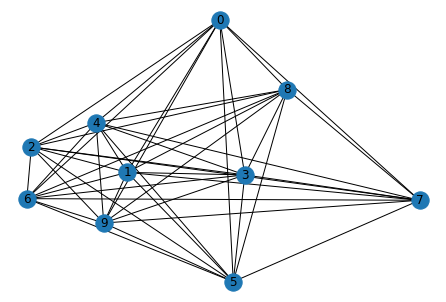

In [29]:
nx.draw(G, with_labels = True,node_size = 300)

# POS-tagging and exercise generation

In [30]:
import stanza
import pandas as pd
import spacy
from spacy import displacy

In [31]:
#stanza.download(lang ='fr', model_dir='.../stanza_models')
#nlp_fr = stanza.Pipeline(lang ='fr', dir ='.../stanza_models')

In [32]:
stanza.download(lang ='en', model_dir='.../stanza_models')

2021-12-10 03:58:21 INFO: Downloading default packages for language: en (English)...
2021-12-10 03:58:22 INFO: File exists: .../stanza_models/en/default.zip.
2021-12-10 03:58:26 INFO: Finished downloading models and saved to .../stanza_models.


In [33]:
nlp_en = stanza.Pipeline(lang ='en', dir ='.../stanza_models')

2021-12-10 03:58:26 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2021-12-10 03:58:26 INFO: Use device: cpu
2021-12-10 03:58:26 INFO: Loading: tokenize
2021-12-10 03:58:26 INFO: Loading: pos
2021-12-10 03:58:26 INFO: Loading: lemma
2021-12-10 03:58:26 INFO: Loading: depparse
2021-12-10 03:58:26 INFO: Loading: sentiment
2021-12-10 03:58:27 INFO: Loading: constituency
2021-12-10 03:58:27 INFO: Loading: ner
2021-12-10 03:58:28 INFO: Done loading processors!


In [34]:
df = pd.read_excel('7000 sentences Corpus with IDs.xlsx', sheet_name="3000", index_col=0)

In [35]:
df.head()

,English,Hindi sentence,Italian,German,French,Spanish,Russian,Tibetan,Chinese,Pin yin,Arabic,Indonesian
ID,,,,,,,,,,,,
1,The beauty of the landscape struck the travell...,NaN,La bellezza del paesaggio colpì i viaggiatori,Die Schönheit der Landschaft wirft die Reisend...,La beauté du paysage frappa les voyageurs,La belleza del paisaje impresionó a los viajeros,Красота пейзажа потрясла путешественников,ཡུལ་སྐོར་བ་ རྣམས་ ཡུལ་ལྗོངས་ ཀྱི་ མཛེས་སྡུག་ ལ...,山水之美令游客们赞叹不已,Shānshuǐ zhīměi lìng yóukè hěn jīdòng,جمالُ المنظرِ أبْهَرَ المسافرينَ.,Keindahan pemandangan alamnya memukau wisatawan.
2,Nobody knows the truth about this affair.,इस बारे मे सच क्या है किसी को भी पता नही है,Nessuno conosce la verità su questa questione,Niemand kennt die Wahrheit in dieser Sache.,Personne ne connaît la vérité sur cette affaire,Nadie conoce la verdad sobre ese asunto,Никто не знает правду по поводу этого дела,འབྲེལ་བ་ འདིའི་ དངོས་ཡོད་ གནས་ཚུལ་ སྐོར་ སུས་ཀ...,没有人知道这件事情的真相,Méiyǒu rén zhīdào zhè jiàn shìqíng de zhēnxiàng,لا أَحَدَ يَعْرِفُ الحَقِيقَةَ إزَاءَ هَذِهِ ا...,Tidak ada yang tahu kebenaran tentang permasal...
3,"In a dictatorship, freedom of expression is li...",तानाशाही मे अभिव्यक्ति की स्वतंत्रता/ स्वाधीनत...,"In una dittatura, la libertà di espressione è ...",In einer Diktatur ist die Meinungsfreiheit ein...,"Dans une dictature, la liberté d'expression es...","En una dictadura, la libertad de expresión es ...",В диктатуре свобода выражения мнения ограничена,སྲིད་དབང་ སྒེར་འཛིན་ གྱི་ ལམ་ལུགས་ ནང་ སྨྲ་བརྗ...,在独裁专制里，言论自由是有限的,"Zài dúcái zhuānzhì lǐ, yánlùn zìyóu shì yǒuxià...",فِي الدِّكْتَاتُورِيَّاتِ تكونُ حريةُ التعبيرِ...,"Dalam kediktatoran, kebebasan berekspresi diba..."
4,"Liberty, equality, fraternity is the motto of ...","स्वतंत्रता, समता और बंधुभाव ये फ्रेंच रिपूब्ली...","Libertà, uguaglianza, fratellanza è il motto d...","Freiheit, Gleichheit, Brüderlichkeit ist der L...","Liberté, égalité, fraternité est la devise de ...","Libertad, igualdad, fraternidad es la divisa d...","Свобода, равенство, братство - девиз французск...",རང་དབང་ དང་། འདྲ་མཉམ། འཆམ་མཐུན་ ནི། ཕྷ་རན་སིའི...,自由，平等，博爱是法国的国家格言,"Zìyóu, píngděng, bó'ài shì fàguó de guójiā géyán",الحُرِّيَةُ، المُسَاواةُ، الأُخُوَّةُ هَذَا هُ...,"Kebebasan, kesetaraan, persaudaraan adalah mot..."
5,He did not help you out of kindness.,उसने आपको दया की भावना से मदद नही की,Non ti ha aiutato per bontà,Er hat dir nicht aus Gutherzigkeit geholfen.,Il ne t'a pas aidé par bonté,Él no te ha ayudado por bondad,Он тебе помог не по доброте,ཁོས་ བཟང་པོ་ བྱས་ ནས་ ཁྱེད་རང་ ལ་ རོགས་པ་ བྱས་...,他不是善意的帮助你,Tā bùshì shànyì de bāngzhù nǐ,لم يسَاعدْك بدافِعِ الطَّيْبوبةِ= الطِّيبَةِ,Dia tidak membantu Anda yang datang dari kebai...


In [36]:
en = pd.DataFrame(df, columns = ['English'])

In [37]:
#Get noun
nouns=[]
for sen in en['English'][:100]:
    dictt= nlp_en(sen).to_dict()[0]
    noun=''
    for i in dictt:
        if 'upos' in i:
            if i['upos']=='NOUN':
                if i['text'] in sen:
                    noun=(i['text'])
    nouns.append(noun)  

In [38]:
data_en = en[0:100]
data_en['Noun']=nouns
data_en[:5]

<ipython-input-38-328c4540f685>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_en['Noun']=nouns


,English,Noun
ID,,
1,The beauty of the landscape struck the travell...,travellers
2,Nobody knows the truth about this affair.,affair
3,"In a dictatorship, freedom of expression is li...",expression
4,"Liberty, equality, fraternity is the motto of ...",republic
5,He did not help you out of kindness.,kindness


In [39]:
#Get verb
verbs=[]
for sen in en['English'][:100]:
    dictt= nlp_en(sen).to_dict()[0]
    verb=''
    for i in dictt:
        if 'upos' in i:
            if (i['upos']=='VERB' or i['upos']=='AUX'):
                if i['text'] in sen:
                    verb=(i['text'])
    verbs.append(verb)

In [40]:
data_en['Verb']=verbs
data_en[:5]

<ipython-input-40-51e598c0bf87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_en['Verb']=verbs


,English,Noun,Verb
ID,,,
1,The beauty of the landscape struck the travell...,travellers,struck
2,Nobody knows the truth about this affair.,affair,knows
3,"In a dictatorship, freedom of expression is li...",expression,limited
4,"Liberty, equality, fraternity is the motto of ...",republic,is
5,He did not help you out of kindness.,kindness,help


In [41]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [42]:
#Get lemma
from lemminflect import getLemma
lemma =[]
for i in range(100):
    doc = getLemma(verbs[i], upos='VERB')[0]
    for token in nlp(verbs[i]):
        lemma.append(doc)

In [43]:
data_en['Lemma']= lemma
data_en.head(10)

<ipython-input-43-8ef94d3da063>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_en['Lemma']= lemma


,English,Noun,Verb,Lemma
ID,,,,
1,The beauty of the landscape struck the travell...,travellers,struck,strike
2,Nobody knows the truth about this affair.,affair,knows,know
3,"In a dictatorship, freedom of expression is li...",expression,limited,limit
4,"Liberty, equality, fraternity is the motto of ...",republic,is,be
5,He did not help you out of kindness.,kindness,help,help
6,His wickedness had no limits.,limits,had,have
7,His elegance impressed the assembly.,assembly,impressed,impress
8,There is a big difference between the western ...,culture,is,be
9,He has high ideals.,ideals,has,have


In [44]:
from lemminflect import getInflection
getInflection('watch', tag='VBD')

('watched',)

In [45]:
past_sim =[]
for i in range(100):
    sim = getInflection(lemma[i], tag='VBD')
    past_sim.append(sim)

In [46]:
data_en['Distr. 1']= past_sim
data_en.head(10)

<ipython-input-46-bd967fefa8bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_en['Distr. 1']= past_sim


,English,Noun,Verb,Lemma,Distr. 1
ID,,,,,
1,The beauty of the landscape struck the travell...,travellers,struck,strike,"(struck,)"
2,Nobody knows the truth about this affair.,affair,knows,know,"(knew,)"
3,"In a dictatorship, freedom of expression is li...",expression,limited,limit,"(limited,)"
4,"Liberty, equality, fraternity is the motto of ...",republic,is,be,"(was, were)"
5,He did not help you out of kindness.,kindness,help,help,"(helped,)"
6,His wickedness had no limits.,limits,had,have,"(had,)"
7,His elegance impressed the assembly.,assembly,impressed,impress,"(impressed,)"
8,There is a big difference between the western ...,culture,is,be,"(was, were)"
9,He has high ideals.,ideals,has,have,"(had,)"


In [47]:
pre_con =[]
for i in range(100):
    con = getInflection(lemma[i], tag='VBG')
    pre_con.append(con)

In [48]:
data_en['Distr. 2']= pre_con
data_en.head(10)

<ipython-input-48-620284cd4e57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_en['Distr. 2']= pre_con


,English,Noun,Verb,Lemma,Distr. 1,Distr. 2
ID,,,,,,
1,The beauty of the landscape struck the travell...,travellers,struck,strike,"(struck,)","(striking,)"
2,Nobody knows the truth about this affair.,affair,knows,know,"(knew,)","(knowing,)"
3,"In a dictatorship, freedom of expression is li...",expression,limited,limit,"(limited,)","(limiting,)"
4,"Liberty, equality, fraternity is the motto of ...",republic,is,be,"(was, were)","(being,)"
5,He did not help you out of kindness.,kindness,help,help,"(helped,)","(helping,)"
6,His wickedness had no limits.,limits,had,have,"(had,)","(having,)"
7,His elegance impressed the assembly.,assembly,impressed,impress,"(impressed,)","(impressing,)"
8,There is a big difference between the western ...,culture,is,be,"(was, were)","(being,)"
9,He has high ideals.,ideals,has,have,"(had,)","(having,)"


In [49]:
pre_sim =[]
for i in range(100):
    pre = getInflection(lemma[i], tag='VBZ')
    pre_sim.append(pre)

In [50]:
data_en['Distr. 3']= pre_sim
data_en.head(10)

<ipython-input-50-a15a491e076e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_en['Distr. 3']= pre_sim


,English,Noun,Verb,Lemma,Distr. 1,Distr. 2,Distr. 3
ID,,,,,,,
1,The beauty of the landscape struck the travell...,travellers,struck,strike,"(struck,)","(striking,)","(strikes,)"
2,Nobody knows the truth about this affair.,affair,knows,know,"(knew,)","(knowing,)","(knows,)"
3,"In a dictatorship, freedom of expression is li...",expression,limited,limit,"(limited,)","(limiting,)","(limits,)"
4,"Liberty, equality, fraternity is the motto of ...",republic,is,be,"(was, were)","(being,)","(is,)"
5,He did not help you out of kindness.,kindness,help,help,"(helped,)","(helping,)","(helps,)"
6,His wickedness had no limits.,limits,had,have,"(had,)","(having,)","(has,)"
7,His elegance impressed the assembly.,assembly,impressed,impress,"(impressed,)","(impressing,)","(impresses,)"
8,There is a big difference between the western ...,culture,is,be,"(was, were)","(being,)","(is,)"
9,He has high ideals.,ideals,has,have,"(had,)","(having,)","(has,)"


In [51]:
do = nlp(verbs[31])
for token in do:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

dresses dress NOUN NNS ROOT xxxx True False


In [52]:
dict_type = {"VB"  : "Simple Present",
             "NN"  : "Simple Present",
             "VBD" : "Simple past",
             "JJ" : "Simple past",
             "VBG" : "Present continuous",
             "VBN" : "Past Participle",
             "VBP" : "Non-3rd person singular present",
             "VBZ" : "Simple Present",
             "NNS" : "Simple Present",
             "MD"  : "Modal"}

In [53]:
tag = []
for i in range(100):
    doc_an = nlp(verbs[i])
    for token in doc_an:
        tag.append(token.tag_)

In [54]:
fe_tag = []
for i in range(100):
    tem = dict_type[tag[i]]
    fe_tag.append(tem)

In [55]:
data_en['Feature RA']= fe_tag
data_en.head(10)

<ipython-input-55-9ef051853232>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_en['Feature RA']= fe_tag


,English,Noun,Verb,Lemma,Distr. 1,Distr. 2,Distr. 3,Feature RA
ID,,,,,,,,
1,The beauty of the landscape struck the travell...,travellers,struck,strike,"(struck,)","(striking,)","(strikes,)",Simple past
2,Nobody knows the truth about this affair.,affair,knows,know,"(knew,)","(knowing,)","(knows,)",Simple Present
3,"In a dictatorship, freedom of expression is li...",expression,limited,limit,"(limited,)","(limiting,)","(limits,)",Simple past
4,"Liberty, equality, fraternity is the motto of ...",republic,is,be,"(was, were)","(being,)","(is,)",Simple Present
5,He did not help you out of kindness.,kindness,help,help,"(helped,)","(helping,)","(helps,)",Simple Present
6,His wickedness had no limits.,limits,had,have,"(had,)","(having,)","(has,)",Simple past
7,His elegance impressed the assembly.,assembly,impressed,impress,"(impressed,)","(impressing,)","(impresses,)",Simple past
8,There is a big difference between the western ...,culture,is,be,"(was, were)","(being,)","(is,)",Simple Present
9,He has high ideals.,ideals,has,have,"(had,)","(having,)","(has,)",Simple Present


In [56]:
fe_1 = []
fe_2 = []
fe_3 = []
for i in range(100):
    f1 = 'Simple Past'
    f2 = 'Present Continuous'
    f3 = 'Simple Present'
    fe_1.append(f1)
    fe_2.append(f2)
    fe_3.append(f3)

In [57]:
data_en['Feature D1']= fe_1
data_en['Feature D2']= fe_2
data_en['Feature D3']= fe_3
data_en.head(10)

<ipython-input-57-5c3ab3fc9139>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_en['Feature D1']= fe_1
<ipython-input-57-5c3ab3fc9139>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_en['Feature D2']= fe_2
<ipython-input-57-5c3ab3fc9139>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

,English,Noun,Verb,Lemma,Distr. 1,Distr. 2,Distr. 3,Feature RA,Feature D1,Feature D2,Feature D3
ID,,,,,,,,,,,
1,The beauty of the landscape struck the travell...,travellers,struck,strike,"(struck,)","(striking,)","(strikes,)",Simple past,Simple Past,Present Continuous,Simple Present
2,Nobody knows the truth about this affair.,affair,knows,know,"(knew,)","(knowing,)","(knows,)",Simple Present,Simple Past,Present Continuous,Simple Present
3,"In a dictatorship, freedom of expression is li...",expression,limited,limit,"(limited,)","(limiting,)","(limits,)",Simple past,Simple Past,Present Continuous,Simple Present
4,"Liberty, equality, fraternity is the motto of ...",republic,is,be,"(was, were)","(being,)","(is,)",Simple Present,Simple Past,Present Continuous,Simple Present
5,He did not help you out of kindness.,kindness,help,help,"(helped,)","(helping,)","(helps,)",Simple Present,Simple Past,Present Continuous,Simple Present
6,His wickedness had no limits.,limits,had,have,"(had,)","(having,)","(has,)",Simple past,Simple Past,Present Continuous,Simple Present
7,His elegance impressed the assembly.,assembly,impressed,impress,"(impressed,)","(impressing,)","(impresses,)",Simple past,Simple Past,Present Continuous,Simple Present
8,There is a big difference between the western ...,culture,is,be,"(was, were)","(being,)","(is,)",Simple Present,Simple Past,Present Continuous,Simple Present
9,He has high ideals.,ideals,has,have,"(had,)","(having,)","(has,)",Simple Present,Simple Past,Present Continuous,Simple Present


In [58]:
data_en.rename(columns={"Verb": "Correct Answer"}, inplace = True)

/Users/thudoan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [59]:
data_en.rename(columns={"English": "Sentence target"}, inplace = True)

In [60]:
data = data_en.drop(['Noun'], axis=1)

In [61]:
data.head(10)

,Sentence target,Correct Answer,Lemma,Distr. 1,Distr. 2,Distr. 3,Feature RA,Feature D1,Feature D2,Feature D3
ID,,,,,,,,,,
1,The beauty of the landscape struck the travell...,struck,strike,"(struck,)","(striking,)","(strikes,)",Simple past,Simple Past,Present Continuous,Simple Present
2,Nobody knows the truth about this affair.,knows,know,"(knew,)","(knowing,)","(knows,)",Simple Present,Simple Past,Present Continuous,Simple Present
3,"In a dictatorship, freedom of expression is li...",limited,limit,"(limited,)","(limiting,)","(limits,)",Simple past,Simple Past,Present Continuous,Simple Present
4,"Liberty, equality, fraternity is the motto of ...",is,be,"(was, were)","(being,)","(is,)",Simple Present,Simple Past,Present Continuous,Simple Present
5,He did not help you out of kindness.,help,help,"(helped,)","(helping,)","(helps,)",Simple Present,Simple Past,Present Continuous,Simple Present
6,His wickedness had no limits.,had,have,"(had,)","(having,)","(has,)",Simple past,Simple Past,Present Continuous,Simple Present
7,His elegance impressed the assembly.,impressed,impress,"(impressed,)","(impressing,)","(impresses,)",Simple past,Simple Past,Present Continuous,Simple Present
8,There is a big difference between the western ...,is,be,"(was, were)","(being,)","(is,)",Simple Present,Simple Past,Present Continuous,Simple Present
9,He has high ideals.,has,have,"(had,)","(having,)","(has,)",Simple Present,Simple Past,Present Continuous,Simple Present
